![](logo.png)

## Day Objectives
# Decision Tree
- Decision tree is the most powerful and popular tool for classification and prediction
- A decision tree is a very specific type of probability tree that enables you to make a decision about some kind of process.
- A Decision tree is a flowchart like tree structure
- Used  in **data mining** for deriving a strategy to reach a particular goal, its also widely used in machine learning

**Types of Algorithms**
    - CART  - classification and regression algorithm
        - gini index/ gini impurity
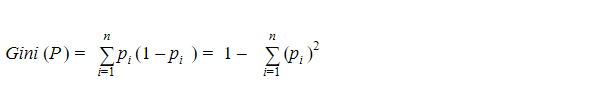
    - ID3  - iterative dechomister 3  
            - Information gain
            - log function / std deviation

**Types of Decision Trees**
 Types of decision trees are based on the type of target variable we have. It can be of two types:

- **Categorical Variable Decision Tree**: Decision Tree which has a categorical target variable then it called a Categorical variable decision tree.
- **Continuous Variable Decision Tree**: Decision Tree has a continuous target variable then it is called Continuous Variable Decision Tree.

#### Important Terminology related to Decision Trees


- **Root Node**: It represents the entire sample and this further gets divided into two or more homogeneous sets.
- **Splitting**: It is a process of dividing a node into two or more sub-nodes.

- **Decision Node**: When a sub-node splits into further sub-nodes, then it is called the decision node.

- **Leaf / Terminal Node**: Nodes do not split is called Leaf or Terminal node.
- **Pruning**: When we remove sub-nodes of a decision node, this process is called pruning. You can say the opposite process of splitting.

- **Branch / Sub-Tree**: A subsection of the entire tree is called branch or sub-tree.

- **Parent and Child Node**: A node, which is divided into sub-nodes is called a parent node of sub-nodes whereas sub-nodes are the child of a parent node.


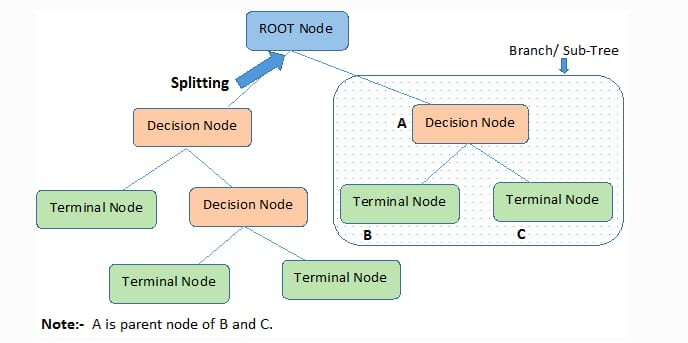

**Advantages**:
    - Simple to understand, interpret, visualize.
    - Decision trees implicitly perform variable screening or feature selection.
    - Can handle both numerical and categorical data. Can also handle multi-output problems.
    - Nonlinear relationships between parameters do not affect tree performance.
**DisAdvantage**:
    - OverFitting Problem
    
    
[Diabetes](https://raw.githubusercontent.com/LavanyaPolamarasetty/Datasets/master/Classification/diabetes.csv)
    

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("https://raw.githubusercontent.com/LavanyaPolamarasetty/Datasets/master/Classification/diabetes.csv")
data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [4]:
data.shape

(768, 9)

In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [10]:
X = data[["Glucose", "BMI"]]
X.sample()

,Glucose,BMI
690,107,24.6


In [11]:
y = data["Outcome"]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [12]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

# Decision Tree as Classifier

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
dcls = DecisionTreeClassifier( max_depth = 3, criterion="gini")

In [71]:
help(dcls)

Help on DecisionTreeClassifier in module sklearn.tree._classes object:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choo

In [72]:
dcls.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [73]:
pred_values = dcls.predict(X_test)

In [74]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [75]:
accuracy_score(y_test,pred_values)* 100

71.86147186147186

In [76]:
confusion_matrix(y_test,pred_values)

array([[141,  10],
       [ 55,  25]], dtype=int64)

In [77]:
X_test.shape[0]

231

In [78]:
112+39+35+45

231

In [79]:
X_train.shape

(537, 2)

In [80]:
from sklearn import tree

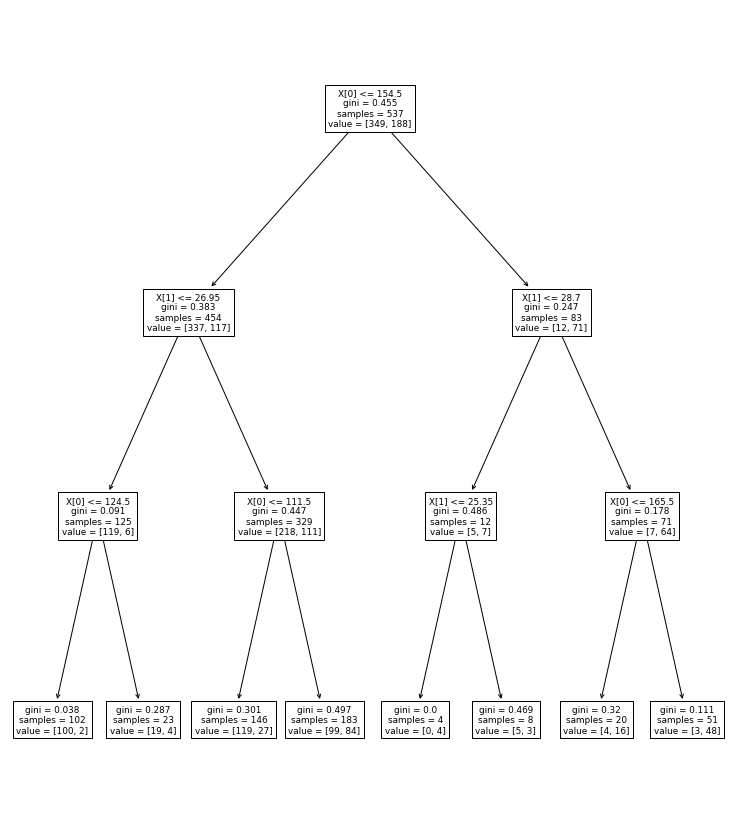

In [81]:
plt.figure(figsize=(13,15))
tree.plot_tree(dcls)
plt.show()

# GINI : 
- Gini index / gini impurity : decrease gini impurity , gini is used to measure the impurity level 
- range between 0 to 0.5

# Entropy 
- it's used to measure impurities inside your dataset
- range between 0 to 1

# Information Gain 
- 1-Entropy 



In [64]:
1-0.04

0.96

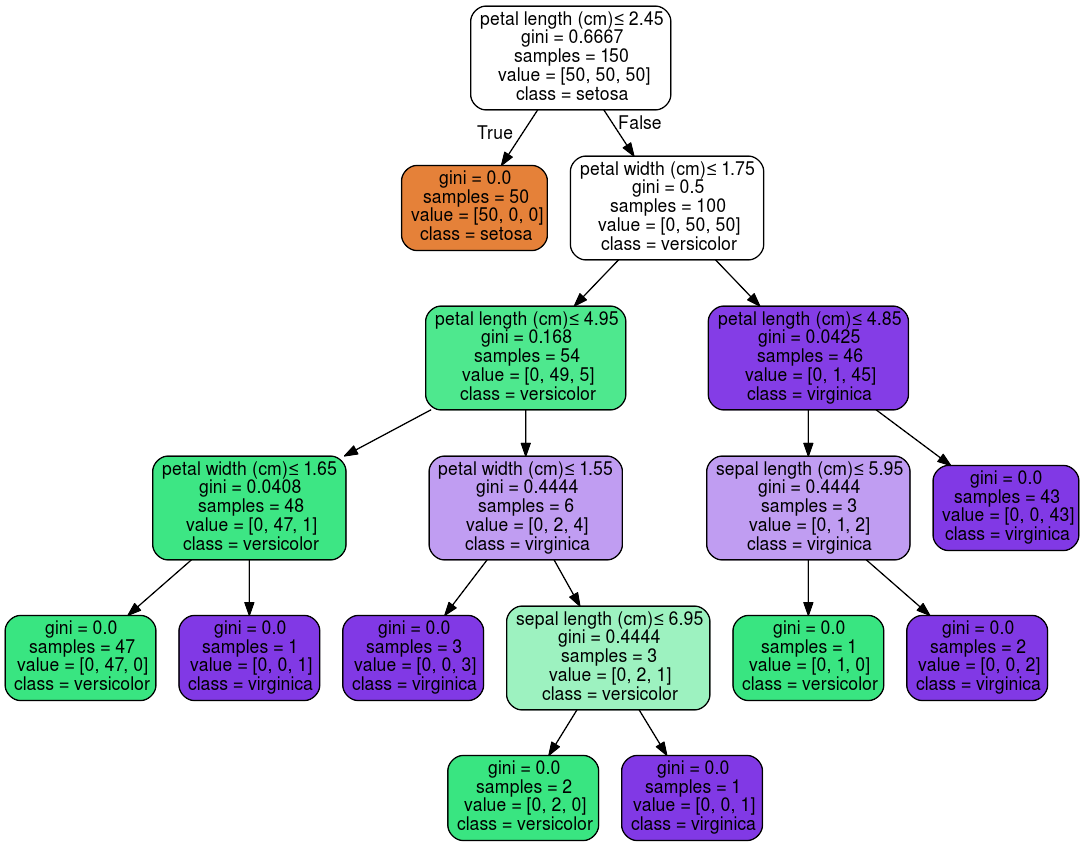

# Calculating Gini Index

![](t1.png)

calculating Probabilities: 
gini = 1 - sum(squares(probabilities of feature))

Probability of Return
return == up : 4/10
return == down : 6/10

Probability of Past Trend : 
PT = Positive : 6/10
PT = Negative : 4/10


p(PT = Positive & return = up) : 4/6
p(PT = positive & retrun = down ) : 2/6
 
Gini index  = 1 - ( (4/6)^2 + (2/6)^2 )


In [68]:
1 - ( (4/6)**2 + (2/6)**2 )

0.4444444444444444

In [69]:
(6/10)*0.44 + (4/10)*0

0.264

# Decision Tree as Regressor

## To predcit Price of Automobile based on input Features

In [82]:
df = pd.read_csv("https://raw.githubusercontent.com/LavanyaPolamarasetty/Datasets/master/Regression/automobiles.csv")
df.head(3)

,make,fuel-type,num-of-doors,body-style,engine-location,length,width,height,num-of-cylinders,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,two,convertible,front,168.8,64.1,48.8,four,111,5000,21,27,13495
1,alfa-romero,gas,two,convertible,front,168.8,64.1,48.8,four,111,5000,21,27,16500
2,alfa-romero,gas,two,hatchback,front,171.2,65.5,52.4,six,154,5000,19,26,16500


In [83]:
df.shape

(201, 14)

In [85]:
X = df[["length","width", "height"]]
y = df["price"]

In [86]:
X_trainr,X_testr,y_trainr,y_testr = train_test_split(X,y,test_size = 0.3, random_state = 0)

In [87]:
from sklearn.tree import DecisionTreeRegressor

In [88]:
dreg = DecisionTreeRegressor(max_depth=3)

In [89]:
help(dreg)

Help on DecisionTreeRegressor in module sklearn.tree._classes object:

class DecisionTreeRegressor(sklearn.base.RegressorMixin, BaseDecisionTree)
 |  DecisionTreeRegressor(*, criterion='mse', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, presort='deprecated', ccp_alpha=0.0)
 |  
 |  A decision tree regressor.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"mse", "friedman_mse", "mae"}, default="mse"
 |      The function to measure the quality of a split. Supported criteria
 |      are "mse" for the mean squared error, which is equal to variance
 |      reduction as feature selection criterion and minimizes the L2 loss
 |      using the mean of each terminal node, "friedman_mse", which uses mean
 |      squared error with Friedman's improvement score for potential 

In [90]:
dreg.fit(X_trainr,y_trainr)

DecisionTreeRegressor(max_depth=3)

In [97]:
list(X_testr.iloc[10])

[177.8, 66.5, 55.5]

In [100]:
dreg.predict([list(X_testr.iloc[10])])

array([13933.86666667])

In [101]:
y_testr.iloc[10]

11245

In [105]:
from sklearn.metrics import r2_score

In [106]:
y_pred = dreg.predict(X_testr)

In [108]:
r2_score(y_testr,y_pred) * 100

36.24370991695635

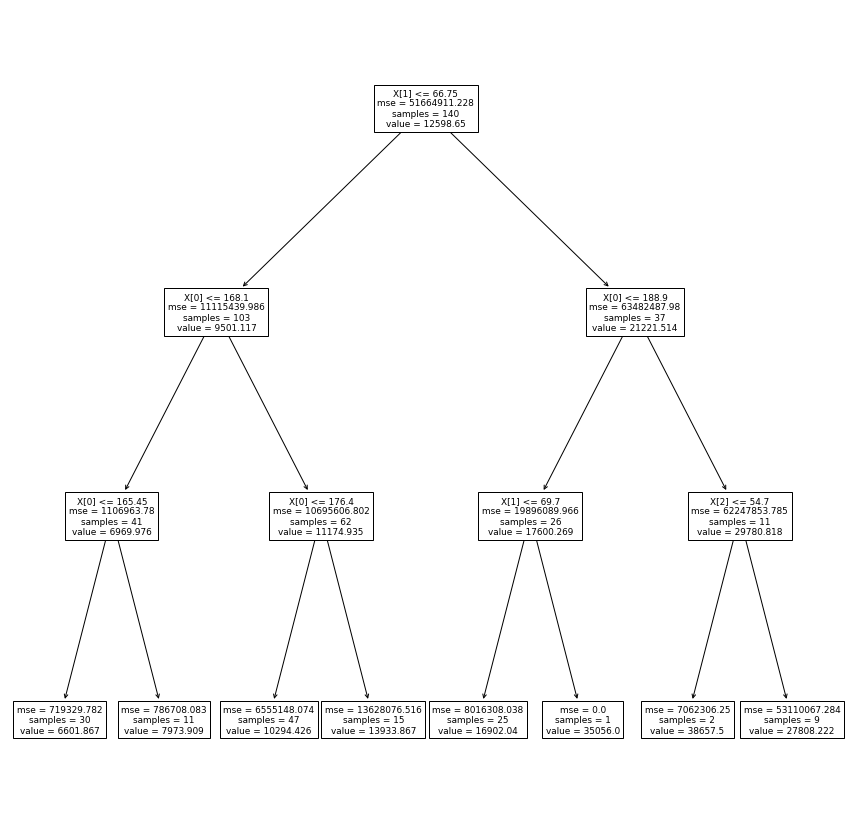

In [112]:
plt.figure(figsize  = (15,15))
tree .plot_tree(dreg)
plt.show()